<a href="https://colab.research.google.com/github/Wilkingc/ddc-datascience/blob/main/Project_5_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

Wilking Chali Alphonse 18/11/2024

## Problem definition

This is an unsupervised clasification project and it consist in three parts:

First)
- The file contains a list of famous people and a brief overview.
- The goal is to provide the capability to
- Take one person from the list as input and output the 10 other people who's overview are "closest" to the person in a Natural Language Processing sense
- Also output the sentiment of the overview of the person.

2 Second)
- For the same person from step 1, use the Wikipedia API to access the whole content of that person's Wikipedia page.
- The goal is to produce the capability to:
  1. For that Wikipedia page determine the sentiment of the entire page
  1. Print out the Wikipedia article
  1. Collect the Wikipedia pages from the 10 nearest neighbors in Step 1)
  1. Determine the nearness ranking of these 10 to your main subject based on their entire Wikipedia page
  1. Compare the nearest ranking from Step 1) with the Wikipedia page nearness ranking

3 Third)
  - Create an interactive notebook where we can select a person from the dataset and output the 10 closest person in a Natural Language Processing sense.

## Imports

In [ ]:
import numpy as np
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import NearestNeighbors
import random
import re
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import nltk
nltk.download('omw-1.4')
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
! python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


## File path & read data

In [ ]:
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv'
data1 = pd.read_csv(url)
data1.head()

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


## Part 1

### Data Cleaning

In [ ]:
data_copy = data1.copy() #Let's make a copy of the dataset
df = data_copy.sample(frac=0.1).reset_index() #Sample 10 % of the dataset and reseting the index for manipulation purposes

In [ ]:
def process_data (text):
  '''
  This function will take a value and apply the lower case method, remove white spaces and characters and convert the text to TextBlob
  '''
  text = text.lower()
  text = re.sub(r"[^\w\s]", "", text)
  text = TextBlob(text)

  return text

In [ ]:
df['text'] = df['text'].apply(process_data) # Apply the function to our dataset

In [ ]:
df['text'].loc[1]  # Display some data to make sure the function cleaned the data

TextBlob("lus manuel ribeiro de castro mondres 3 september 1961 is a former portuguese football player and current manager of the segunda liga football club porto bfor much of his childhood and youth castro suffered from a debilitating disease castro is a graduate from the university of coimbra where he majored in physicsone year after retiring from professional football castro began his career as football manager with former club rd gueda where he would remain for two seasons following his spell with gueda castro went on to manage gd mealhada cd estarreja and ad sanjoanense before getting his big break in 2004 where he was appointed manager of fc penafielhis first season with the newly promoted rubronegros saw him guide his side to an 11th place in the national championship castros most notable victory which helped his side claim an 11th place finish came on the 7 may 2005 when penafiel defeated sl benficahis second season with the penafidelenses proved to be disastrous as his side wa

In [ ]:
def singularize_text(text):
  '''
  This function lemmatize by splitting the data and returns a join version of it to mantain integrity
  '''

  lemmatizer = WordNetLemmatizer()
  words = text.split()  # Split the text into words
  singularized_words = [lemmatizer.lemmatize(word) for word in words]

  return ' '.join(singularized_words)

In [ ]:
df['text'] = df['text'].apply(singularize_text)

### Bag of words

In [ ]:
vectorizer = CountVectorizer(stop_words='english') # Transfor the text into a bag of words
bow = vectorizer.fit_transform(df["text"])
bow = bow.toarray() # Tranform the result to a numpy array

### TF-IDF

In [ ]:
# Perform the TF-IDF transformation - (CountVectorizer + TfidfTransformer)
tf_idf_tran = TfidfTransformer()
tf_idf = tf_idf_tran.fit_transform(bow)
tf_idf = tf_idf.toarray()
tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### K- Nearest Neighbor

In [ ]:
random.seed(12) #Random seed to mantain consistency in the output
random_index = random.randint(0, len(df) - 1) # Creating a random output of our dataset to index later for a name.
random_person = df.iloc[random_index]['name'] # Selecting randomly a person from our dataset using the random index variable.
random_index, random_person

(3887, 'John Woodcock (magistrate)')

In [ ]:
# df.sample(n=1)

In [ ]:
sent0 = np.array([tf_idf[random_index]]) # Creating the reference matrix
sent0.shape

(1, 84228)

In [ ]:
kn = NearestNeighbors().fit(tf_idf) # Fitting the df_idf matrix to Nearest Neighbor

In [ ]:
distances, indices = kn.kneighbors(
  X = sent0,
  n_neighbors = 11, #Selecting a K of 11 to ourput the 10 closest values in our dataset
)


In [ ]:
distances # Display the distance

array([[0.        , 1.34084993, 1.35578504, 1.36304029, 1.36455365,
        1.36662821, 1.36708967, 1.36855959, 1.36965341, 1.37041601,
        1.37058556]])

In [ ]:
# Using list comprehension to display names of closest person
group_of_p = [ x for i,x in enumerate(df['name']) if i in indices[0] ]
group_of_p

['Mike Culverhouse',
 'Susumu Okubo',
 'Julian Popov',
 'Simon L. Leis, Jr.',
 'David N. Kelley',
 'Mark P. Fitzgerald',
 'Massimo De Santis',
 'Shen Yongping',
 'Helen Barolini',
 'John Woodcock (magistrate)',
 'Wilfred Nderitu']

### Sentiment of the person selected

In [ ]:
[ i for i,x in enumerate(df['text']) if i in indices[0] ] # Taking a look at the indices

[124, 492, 799, 1318, 2297, 2404, 2491, 2979, 3731, 3887, 4241]

In [ ]:
# np.array(df['text'])[indices]

In [ ]:
count = 0 # Starting a counter to give our output an index
for index in indices[0]: # Looping to find the Sentiment of each individual
  text = df.iloc[index]['text']
  blob = TextBlob(text)
  sentiment_score = blob.sentiment
  count += 1
  print(f"Person {count} sentiment scores are: {sentiment_score}")

Person 1 sentiment scores are: Sentiment(polarity=0.007499999999999997, subjectivity=0.1600925925925926)
Person 2 sentiment scores are: Sentiment(polarity=0.09372786304604487, subjectivity=0.23472058244785513)
Person 3 sentiment scores are: Sentiment(polarity=0.015277777777777779, subjectivity=0.2777777777777778)
Person 4 sentiment scores are: Sentiment(polarity=-0.05051190476190478, subjectivity=0.2989047619047619)
Person 5 sentiment scores are: Sentiment(polarity=-0.05333333333333334, subjectivity=0.20333333333333337)
Person 6 sentiment scores are: Sentiment(polarity=0.06174242424242424, subjectivity=0.14105113636363636)
Person 7 sentiment scores are: Sentiment(polarity=-0.04435941043083901, subjectivity=0.3432397959183673)
Person 8 sentiment scores are: Sentiment(polarity=0.0787569573283859, subjectivity=0.24211502782931354)
Person 9 sentiment scores are: Sentiment(polarity=0.011820987654320984, subjectivity=0.2955864197530864)
Person 10 sentiment scores are: Sentiment(polarity=0.05

# Part 2 -  Using Wikipedia API

### Imports

In [ ]:
%%capture output
#install Wikipedia API
!pip3 install wikipedia-api

In [ ]:
import wikipediaapi

In [ ]:
np.array(df['URI'])[indices]

array([['<http://dbpedia.org/resource/John_Woodcock_(magistrate)>',
        '<http://dbpedia.org/resource/Julian_Popov>',
        '<http://dbpedia.org/resource/Mark_P._Fitzgerald>',
        '<http://dbpedia.org/resource/Wilfred_Nderitu>',
        '<http://dbpedia.org/resource/Simon_L._Leis,_Jr.>',
        '<http://dbpedia.org/resource/Helen_Barolini>',
        '<http://dbpedia.org/resource/Mike_Culverhouse>',
        '<http://dbpedia.org/resource/David_N._Kelley>',
        '<http://dbpedia.org/resource/Massimo_De_Santis>',
        '<http://dbpedia.org/resource/Susumu_Okubo>',
        '<http://dbpedia.org/resource/Shen_Yongping>']], dtype=object)

In [ ]:
topic = random_person
wikipedia = wikipediaapi.Wikipedia(user_agent = 'salcocho')
page_ex = wikipedia.page(topic)
wiki_text = page_ex.text
wiki_text

'Henry John Woodcock  (born 23 March 1967) is an Italian prosecutor currently based in Naples.\n\nBackground and early life\nBorn in Taunton, England, Woodcock\'s father was British and worked as a teacher at Livorno\'s Naval Academy in northern Italy and his mother was from the southern Italian city of Naples. Woodcock worked in Potenza for about ten years where he was a colleague of the former magistrate Luigi De Magistris, mayor of Naples until 2021, and they cooperated in anti-mafia investigations.\n\nSome high-profile prosecutions\nWoodcock became a prosecutor in 1996 and has become noted for his investigations in high-profile scandals including the Italian "Vip Gate" in 2003, and "Savoiagate" in 2006.\nOn 16 June 2006, Woodcock asked for, and obtained from the Judge of the preliminary investigation an arrest warrant against Vittorio Emanuele of Savoy in Varenna accusing him of participating in corruption, forgery, and organization of prostitution in relation to an investigation o

In [ ]:
clean_data = process_data(wiki_text) # Using the process_data function to remove characters, spaces, lowercase and make it a TextBlob
clean_data

TextBlob("henry john woodcock  born 23 march 1967 is an italian prosecutor currently based in naples

background and early life
born in taunton england woodcocks father was british and worked as a teacher at livornos naval academy in northern italy and his mother was from the southern italian city of naples woodcock worked in potenza for about ten years where he was a colleague of the former magistrate luigi de magistris mayor of naples until 2021 and they cooperated in antimafia investigations

some highprofile prosecutions
woodcock became a prosecutor in 1996 and has become noted for his investigations in highprofile scandals including the italian vip gate in 2003 and savoiagate in 2006
on 16 june 2006 woodcock asked for and obtained from the judge of the preliminary investigation an arrest warrant against vittorio emanuele of savoy in varenna accusing him of participating in corruption forgery and organization of prostitution in relation to an investigation of the casino of campione

In [ ]:
group_of_p

['Mike Culverhouse',
 'Susumu Okubo',
 'Julian Popov',
 'Simon L. Leis, Jr.',
 'David N. Kelley',
 'Mark P. Fitzgerald',
 'Massimo De Santis',
 'Shen Yongping',
 'Helen Barolini',
 'John Woodcock (magistrate)',
 'Wilfred Nderitu']

In [ ]:
data = []

In [ ]:
for i in group_of_p:
  # Get the Wikipedia page text
  group = wikipedia.page(i)
  # Create a list/dictionary to store data (optional)
  data_row = {'title': i, 'text': group.text}  # Example dictionary

  data.append(data_row)

In [ ]:
rsult_df = pd.DataFrame(data)

In [ ]:
rsult_df

,title,text
0,Mike Culverhouse,Mike Culverhouse was Chief Constable of the Is...
1,Susumu Okubo,"Susumu Okubo (大久保 進, Ōkubo Susumu, 2 March 193..."
2,Julian Popov,Julian Georgiev Popov (Bulgarian: Юлиан Георги...
3,"Simon L. Leis, Jr.","Simon L. Leis Jr. (; born June 12, 1934) is a ..."
4,David N. Kelley,"David N. Kelley (born December 1, 1959) is an ..."
5,Mark P. Fitzgerald,Mark P. Fitzgerald (born 1951) is a retired Un...
6,Massimo De Santis,Massimo De Santis (born 8 April 1962) is an It...
7,Shen Yongping,"Shen Yongping (Chinese: 沈勇平; born November 23,..."
8,Helen Barolini,Helen Frances Barolini (née Mollica; November ...
9,John Woodcock (magistrate),Henry John Woodcock (born 23 March 1967) is a...


### Clean Data

In [ ]:
rsult_df['text'] = rsult_df['text'].apply(process_data) # Applying process_data function to remove chatacters and spaces

In [ ]:
rsult_df['text'] = rsult_df['text'].apply(singularize_text) # Using Singularize_text function to singularize the text extracted

### BoW

In [ ]:
vectorizer2 = CountVectorizer(stop_words='english')
bow2 = vectorizer2.fit_transform(rsult_df['text'])
bow2 = bow2.toarray()
bow2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### TF-IDF

In [ ]:
# Perform the TF-IDF transformation - (CountVectorizer + TfidfTransformer)
tf_idf_tran2 = TfidfTransformer()
tf_idf2 = tf_idf_tran2.fit_transform(bow2)
tf_idf2 = tf_idf2.toarray()
tf_idf2

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.06353142,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.05363375, 0.        ,
        0.        ],
       ...,
       [0.02017262, 0.02017262, 0.02017262, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### K-Nearest Neighbor



In [ ]:
kn2 = NearestNeighbors().fit(tf_idf2) # Fitting the new TF-IDF to the K-nearest neighbor model

In [ ]:
subject = np.array([tf_idf2[0]])
subject.shape

(1, 1454)

In [ ]:
distances2, indices2 = kn2.kneighbors(
  X = subject,
  n_neighbors = 11,
)

In [ ]:
distances2

array([[0.        , 1.33823445, 1.35075772, 1.35202659, 1.36031679,
        1.36153342, 1.36660397, 1.36837074, 1.38834412, 1.3954075 ,
        1.39868533]])

In [ ]:
new_group = [ x for i,x in enumerate(rsult_df['title']) if i in indices2[0] ]
new_group

['Mike Culverhouse',
 'Susumu Okubo',
 'Julian Popov',
 'Simon L. Leis, Jr.',
 'David N. Kelley',
 'Mark P. Fitzgerald',
 'Massimo De Santis',
 'Shen Yongping',
 'Helen Barolini',
 'John Woodcock (magistrate)',
 'Wilfred Nderitu']

In [ ]:
np.array(rsult_df['title'])[indices2]

array([['Mike Culverhouse', 'David N. Kelley', 'Wilfred Nderitu',
        'Simon L. Leis, Jr.', 'John Woodcock (magistrate)',
        'Julian Popov', 'Massimo De Santis', 'Shen Yongping',
        'Mark P. Fitzgerald', 'Helen Barolini', 'Susumu Okubo']],
      dtype=object)

In [ ]:
data_to_compare= {'Names' : group_of_p, 'distance_1': distances.squeeze(), 'distance_2': distances2.squeeze()}
df2 = pd.DataFrame(data_to_compare)
df2

,Names,distance_1,distance_2
0,Mike Culverhouse,0.000000,0.000000
1,Susumu Okubo,1.340850,1.338234
2,Julian Popov,1.355785,1.350758
3,"Simon L. Leis, Jr.",1.363040,1.352027
4,David N. Kelley,1.364554,1.360317
5,Mark P. Fitzgerald,1.366628,1.361533
6,Massimo De Santis,1.367090,1.366604
7,Shen Yongping,1.368560,1.368371
8,Helen Barolini,1.369653,1.388344
9,John Woodcock (magistrate),1.370416,1.395407


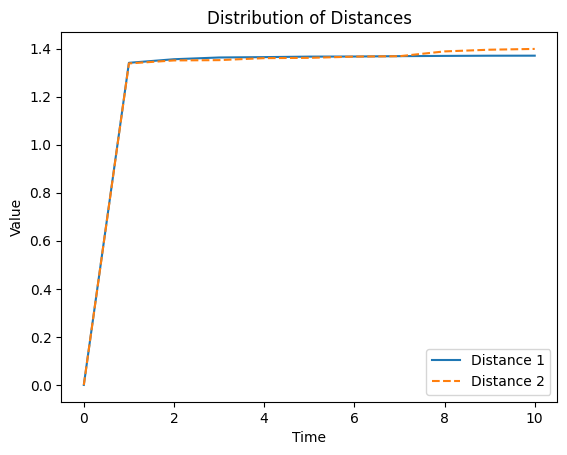

In [ ]:
x = df2['distance_1']
y =  df2['distance_2']
plt.plot(x, '-', label='Distance 1');
plt.plot(y, '--', label='Distance 2');
plt.title('Distribution of Distances')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

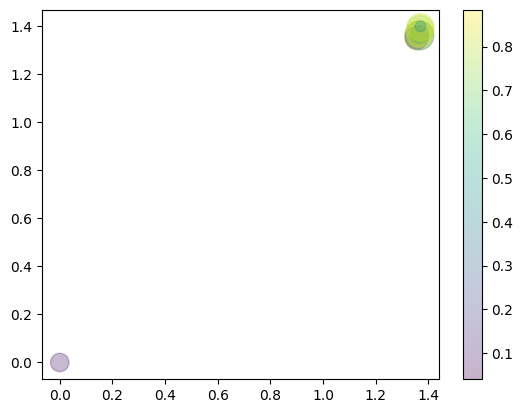

In [ ]:
n = 11
x = df2['distance_1']
y = df2['distance_2']
colors = np.random.random(n)
sizes = 500 * np.random.random(n)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar() ;

### Sentiment of the person

In [ ]:
count = 0 # Starting a counter to give our output an index
for index in indices2[0]: # Looping to find the Sentiment of each individual
  text = rsult_df.iloc[index]['text']
  blob = TextBlob(text)
  sentiment_score = blob.sentiment
  person = group_of_p[index]
  count += 1
  all = {"index": count, "Person":person, }
  print(f"{count} sentiment scores are: {sentiment_score}")

1 sentiment scores are: Sentiment(polarity=-0.037481351040673086, subjectivity=0.34289016068677075)
2 sentiment scores are: Sentiment(polarity=0.0735064935064935, subjectivity=0.2526406926406926)
3 sentiment scores are: Sentiment(polarity=-0.03911640211640211, subjectivity=0.3978465608465607)
4 sentiment scores are: Sentiment(polarity=-0.04923076923076923, subjectivity=0.19538461538461543)
5 sentiment scores are: Sentiment(polarity=-0.02236842105263158, subjectivity=0.08640350877192982)
6 sentiment scores are: Sentiment(polarity=0.08563311688311688, subjectivity=0.23068181818181818)
7 sentiment scores are: Sentiment(polarity=-0.03501984126984128, subjectivity=0.36656746031746035)
8 sentiment scores are: Sentiment(polarity=-0.07333333333333333, subjectivity=0.3691666666666667)
9 sentiment scores are: Sentiment(polarity=0.01888888888888889, subjectivity=0.25333333333333335)
10 sentiment scores are: Sentiment(polarity=0.0914026629935721, subjectivity=0.19120752984389355)
11 sentiment scor

## Part 3

In [113]:
person_dropdown = widgets.Dropdown(options=sorted(df['name'])) # Creating an interactive dropdown from our name column

In [114]:
def person(text):

  '''
This function will take as input the name selected from the person_dropdown variable and will iterate to output the 10 nearest people around the selected person,
display the distance of each other, display the sentiments both polarity and subjectivity and then plot the results in a bar plot
  '''

  print(f"The person is {text}") # We will use this line to display the name of the selcted person
  index = df[df['name'] == text].index[0] # parcing the index for the selected person
  per = np.array([tf_idf[index]]) # Creating the reference from our tf_idf matrix
  distances3, indices3 = kn.kneighbors(
      X=per, ## Fitting the reference into the K- nearest Neighbor model
      n_neighbors=11 # Selecting the 10 nearest people around the selected person
  )
  group_of_p1 = [x for i, x in enumerate(df['name']) if i in indices3[0]] # Retrieving all the names from our KNN model

  sentiments = [] # Creating and empty list to append the polarity and subjectivity of each individual
  for name in group_of_p1: # Looping over all the selected individuals to extract the sentiment values
      person_text = df[df['name'] == name]['text'].values[0]
      blob = TextBlob(person_text)
      sentiments.append((blob.sentiment.polarity, blob.sentiment.subjectivity)) # Appending both polarity and subjectivity individually to our empty list.

  dataframe = {'Names': group_of_p1, 'Person_distance_1': distances3.squeeze(), 'Polarity': [s[0] for s in sentiments], 'Subjectivity': [s[1] for s in sentiments]} # Dict of our values
  final = pd.DataFrame(dataframe) # Creating a data frame with the dictionary containing all the values

  print(final) # This function will output our dataframe

  final.plot(kind='bar') # Creating a bar plot to generate a vizualization of every iteration
  plt.title('Distance to Reference Person')
  plt.xlabel('Person index')
  plt.ylabel('Distance')
  plt.xticks(rotation=45)
  plt.show()

In [115]:
out = widgets.interactive_output(person, {'text': person_dropdown})

display(person_dropdown, out)

Dropdown(options=('%C3%81lvaro Uribe', '%C3%89ric Gagn%C3%A9', '%C3%8D%C3%B1igo Cuesta', '%C5%BDeljka Antunovi…

Output()